# Dimensionality Reduction

## Principal Component Analysis

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.



In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

# Loading the breast cancer dataset
breast = load_breast_cancer()

# Getting the dataser into a Panda's DataFrame together with the target variable
breast_data = pd.DataFrame(data = np.concatenate([breast.data,breast.target.reshape(-1,1)],axis=1),
                          columns = np.append(breast.feature_names,'target'))
breast_data.shape

(569, 31)

In [3]:
breast_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [4]:
from sklearn.preprocessing import StandardScaler

# Rescaling the dataset and checking that we indeed have 0 mean and standard deviation 1
x = breast_data.loc[:, breast.feature_names].values
x = StandardScaler().fit_transform(x)

normalised_breast = pd.DataFrame(x,columns=breast.feature_names)
display(normalised_breast.head())
normalised_breast.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.153111e-15,-6.568462e-15,-6.993039e-16,-8.553985e-16,6.081447e-15,-1.136369e-15,-2.997017e-16,1.023981e-15,-1.860648e-15,-1.504752e-15,...,-2.297713e-15,1.742016e-15,-1.198807e-15,6.118909e-16,-5.094929e-15,-2.122887e-15,6.118909e-16,-1.998011e-16,-2.422589e-15,2.497514e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


Now comes the critical part, the next few lines of code will be projecting the thirty-dimensional Breast Cancer data to two-dimensional **principal components**. Here, several components represent the lower dimension in which you will project your higher dimension data.


In [8]:
from sklearn.decomposition import PCA

pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

print(principalComponents_breast)

# Transform into a DataFrame
principal_breast_df = pd.DataFrame(data = principalComponents_breast, columns = ['PC1', 'PC2'])
principal_breast_df

[[ 9.19283683  1.94858307]
 [ 2.3878018  -3.76817174]
 [ 5.73389628 -1.0751738 ]
 ...
 [ 1.25617928 -1.90229671]
 [10.37479406  1.67201011]
 [-5.4752433  -0.67063679]]


,PC1,PC2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


In [9]:
# Finally, we can see how much of the Principal components explain the variance
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


The latter code represents the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace. In this case PC1 holds 44.2% of the information while PC2 holds only 19% of the information. Also, the other point to note is that while projecting thirty-dimensional data to a two-dimensional data, 36.8% information was lost. However, this means that we can now visualize them in a graph.

<Figure size 640x480 with 0 Axes>

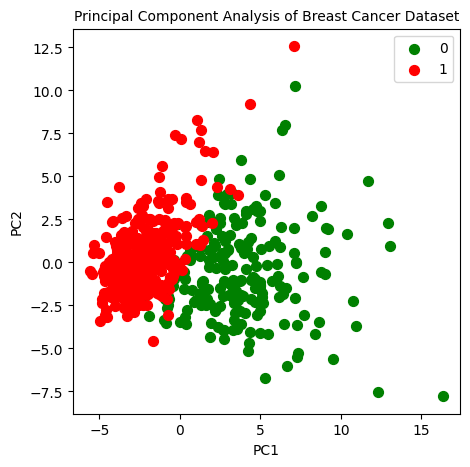

In [21]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(5,5))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('PC1',fontsize=10)
plt.ylabel('PC2',fontsize=10)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=10)
targets = [0, 1]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = breast_data['target'] == target
    plt.scatter(principal_breast_df.loc[indicesToKeep, 'PC1']
               , principal_breast_df.loc[indicesToKeep, 'PC2'], c = color, s = 50)

plt.legend(targets,prop={'size': 10})

## Multiple Correspondence Analysis

MCA is a feature extraction method; essentially PCA for categorical variables. You can use it, for example, to address multicollinearity or the curse of dimensionality with big categorical variables.

In [30]:
#!pip install prince==0.7.1 
import prince

df = pd.DataFrame({'Product': ['TV', 'TV', 'Comp', 'TV', 'TV', 'Comp',
                               'Comp', 'Comp', 'TV', 'Radio', 'TV', 'Radio', 'Radio',
                               'Radio', 'Comp', 'Comp', 'TV', 'TV', 'Radio', 'TV'],
                   'Country': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
                               'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']})

display(df.head())
cont_matrix = pd.crosstab(index=df['Country'], columns=df['Product'])
cont_matrix

,Product,Country
0,TV,A
1,TV,A
2,Comp,A
3,TV,A
4,TV,B


Product,Comp,Radio,TV
Country,,,
A,1,0,3
B,3,2,3
C,2,3,3


In [36]:
ca = prince.CA(
    n_components=3,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
ca.fit(cont_matrix)
ca.row_coordinates(cont_matrix)

,0,1,2
A,0.674218,-0.061342,-1.0
B,-0.078279,0.158500,-1.0
C,-0.258830,-0.127830,-1.0


In [37]:
ca.column_coordinates(cont_matrix)

,0,1,2
Comp,-0.037637,0.200624,1.0
Radio,-0.538332,-0.100990,1.0
TV,0.324164,-0.077644,1.0


In [40]:
X = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/balloons/adult+stretch.data')
X.columns = ['Color', 'Size', 'Action', 'Age', 'Inflated']

print(X.head())

mca = prince.MCA()
mca.fit(X) 
mca.transform(X)

    Color   Size   Action    Age Inflated
0  YELLOW  SMALL  STRETCH  ADULT        T
1  YELLOW  SMALL  STRETCH  CHILD        F
2  YELLOW  SMALL      DIP  ADULT        F
3  YELLOW  SMALL      DIP  CHILD        F
4  YELLOW  LARGE  STRETCH  ADULT        T


,0,1
0,0.705387,1.002986e-14
1,-0.386586,8.424169e-15
2,-0.386586,7.805113e-15
3,-0.852014,7.213342e-15
4,0.783539,-6.333333e-01
5,0.783539,-6.333333e-01
6,-0.308434,-6.333333e-01
7,-0.308434,-6.333333e-01
8,-0.773862,-6.333333e-01
9,0.783539,6.333333e-01


## Classical Multidimensional Scaling (cMDS)

It is a means of visualizing the level of similarity of individual objects of a data set using the information contained in the distance matrix. It maps points residing in a higher-dimensional space to a lower-dimensional space while preserving the distances between those points as much as possible.

It relies on the distances between the data points to define the projection and does not consider other types of relationships between the data points, such as correlations or associations. This means that MDS may not be suitable for data sets that have complex, non-distance-based relationships, or that have missing or noisy distances.

It is sensitive to outliers and noise in the data, which can affect the quality of the projection and the interpretability of the results.

It is a global optimization technique, which means that it finds a single projection that is optimal for the entire data set. This can be problematic for data sets that have complex, multi-modal structures, or that have multiple clusters or groups of data points, as MDS may not be able to capture the local structure of the data within each group.

MDS is more focused on preserving the relationships between the data points, while PCA and t-SNE are more focused on summarizing the data and finding the most relevant dimensions. 

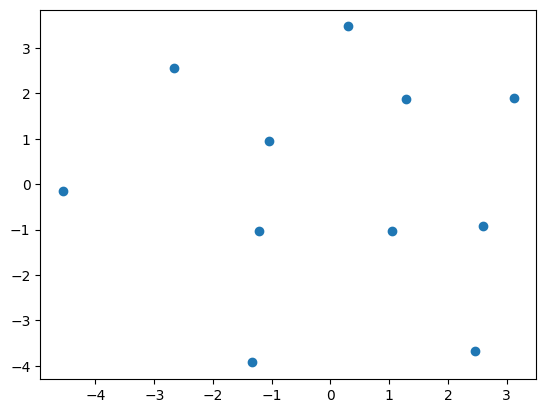

In [54]:
import numpy as np
from sklearn.manifold import MDS
# Generate some random data with
# 10 dimensions and 100 samples
X = np.random.randn(11, 10)

# Create an MDS object with
# 2 dimensions and random start
mds = MDS(n_components=2, random_state=0)

# Fit the data to the MDS
# object and transform the data
X_transformed = mds.fit_transform(X)

plt.scatter(X_transformed[:,0],X_transformed[:,1])

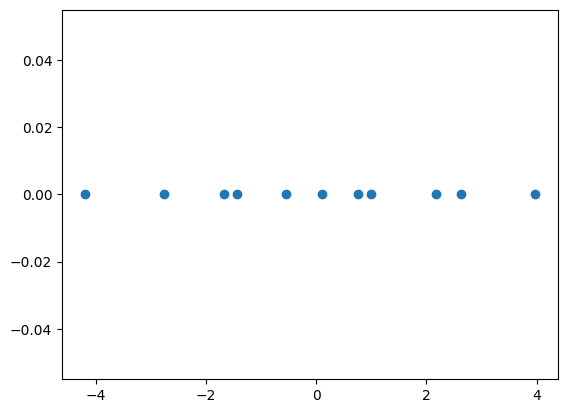

In [55]:
X = np.random.randn(11, 10)

# Create an MDS object with
# 2 dimensions and random start
mds = MDS(n_components=1, random_state=0)

# Fit the data to the MDS
# object and transform the data
X_transformed = mds.fit_transform(X)

plt.scatter(X_transformed,np.zeros(len(X_transformed)))

## Kernel PCA

Kernel PCA uses a kernel function to project dataset into a higher dimensional feature space, where it is linearly separable. There are various kernel methods like linear, polynomial, and gaussian. 

It is a technique used in machine learning for nonlinear dimensionality reduction. It is an extension of the classical Principal Component Analysis (PCA) algorithm, which is a linear method that identifies the most significant features or components of a dataset. KPCA applies a nonlinear mapping function to the data before applying PCA, allowing it to capture more complex and nonlinear relationships between the data points.

In KPCA, a kernel function is used to map the input data to a high-dimensional feature space, where the nonlinear relationships between the data points can be more easily captured by linear methods such as PCA. The principal components of the transformed data are then computed, which can be used for tasks such as data visualization, clustering, or classification.

One of the advantages of KPCA over traditional PCA is that it can handle nonlinear relationships between the input features, which can be useful for tasks such as image or speech recognition. KPCA can also handle high-dimensional datasets with many features by reducing the dimensionality of the data while preserving the most important information.

However, KPCA has some limitations, such as the need to choose an appropriate kernel function and its corresponding parameters, which can be difficult and time-consuming. KPCA can also be computationally expensive for large datasets, as it requires the computation of the kernel matrix for all pairs of data points.


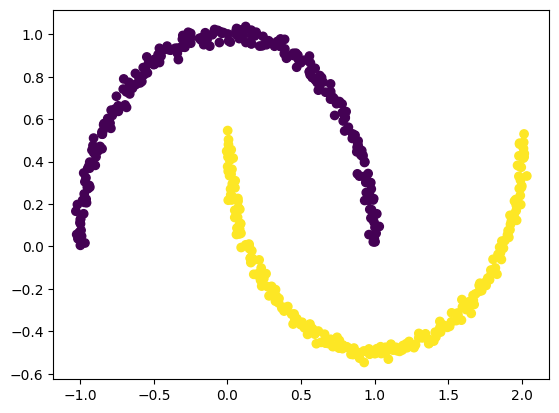

In [56]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.02, random_state=417)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()


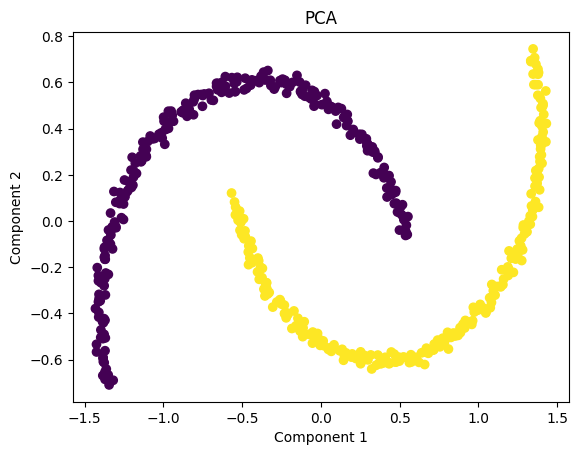

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
 
plt.title("PCA")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

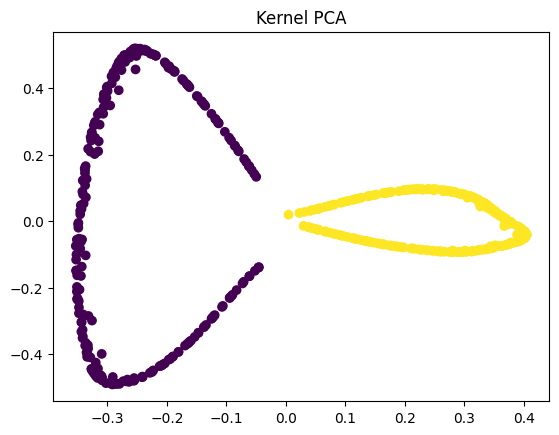

In [58]:
from sklearn.decomposition import KernelPCA
# We use the Radial Basis Function (RBF) Kernel 
kpca = KernelPCA(kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X)

plt.title("Kernel PCA")
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.show()


## Non-metric Multidimensional Scaling (NMDS)

NMDS produces an ordination based on a distance or dissimilarity matrix. It is a rank-based approach, which means that the original distance data is substituted with ranks. For example, rather than object A being 2.1 units distant from object B and 4.4 units distant from object C, object C is the "first" most distant from object A while object C is the "second" most distant. While information about the magnitude of distances is lost, rank-based methods are generally more robust to data which do not have an identifiable distribution.

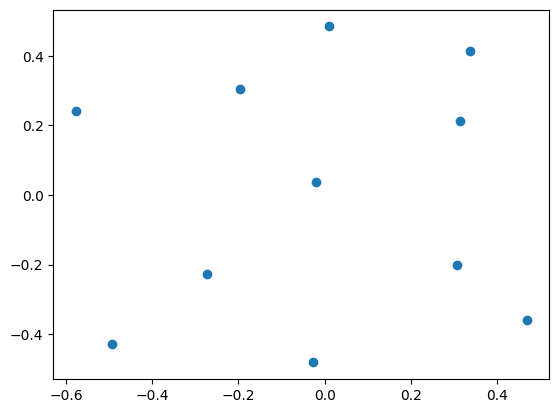

In [59]:
import numpy as np
from sklearn.manifold import MDS
# Generate some random data with
# 10 dimensions and 100 samples
X = np.random.randn(11, 10)

# Create an MDS object with
# 2 dimensions and random start
mds = MDS(n_components=2, random_state=0, metric=False)

# Fit the data to the MDS
# object and transform the data
X_transformed = mds.fit_transform(X)

plt.scatter(X_transformed[:,0],X_transformed[:,1])

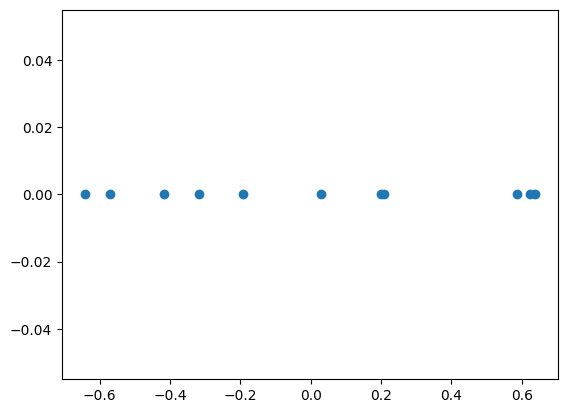

In [61]:
X = np.random.randn(11, 10)

# Create an MDS object with
# 2 dimensions and random start
mds = MDS(n_components=1, random_state=0, metric=False)

# Fit the data to the MDS
# object and transform the data
X_transformed = mds.fit_transform(X)

plt.scatter(X_transformed,np.zeros(len(X_transformed)))

## IsoMap

The Isomap algorithm, short for Isometric Mapping can be viewed as an extension of Multi-dimensional Scaling (MDS) or Kernel PCA. It seeks a lower-dimensional embedding which maintains geodesic distances between all points. The Isomap algorithm comprises three stages:

- Nearest neighbor search.
- Shortest-path graph search.
- Partial eigenvalue decomposition. The embedding is encoded in the eigenvectors corresponding to the largest eigenvalues of the isomap kernel.

(1797, 64)


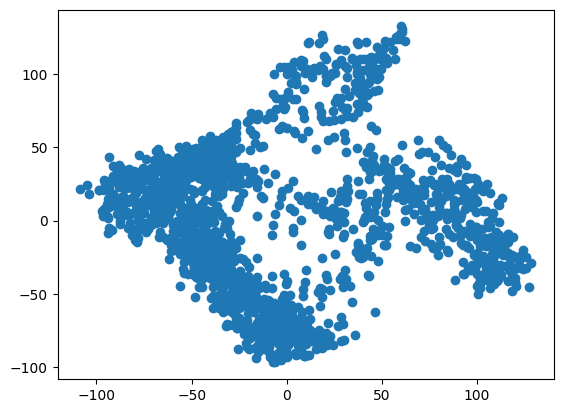

In [70]:
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap
X, _ = load_digits(return_X_y=True)
print(X.shape)

embedding = Isomap(n_components=2,n_neighbors=10)
X_transformed = embedding.fit_transform(X)
plt.scatter(X_transformed[:,0],X_transformed[:,1])

##  t-distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high. This will suppress some noise and speed up the computation of pairwise distances between samples. 

In [79]:
from __future__ import print_function
import time

import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

mnist = fetch_openml("mnist_784", as_frame=False)
X, y = shuffle(mnist.data, mnist.target, random_state=2)
X /= 255
print(X.shape, y.shape)

(70000, 784) (70000,)


In [80]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))

#X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 786)


In [83]:
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,8
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,6
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,6
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,7


<Figure size 640x480 with 0 Axes>

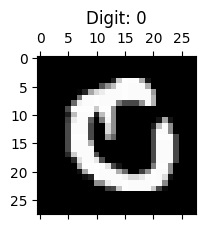

In [93]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

plt.gray()
fig = plt.figure( figsize=(16,7) )

ax = fig.add_subplot(3,5,1, title="Digit: {}".format(str(df.loc[rndperm[i],'label'])) )
    
ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [94]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09746116 0.07155445 0.06149531]


<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

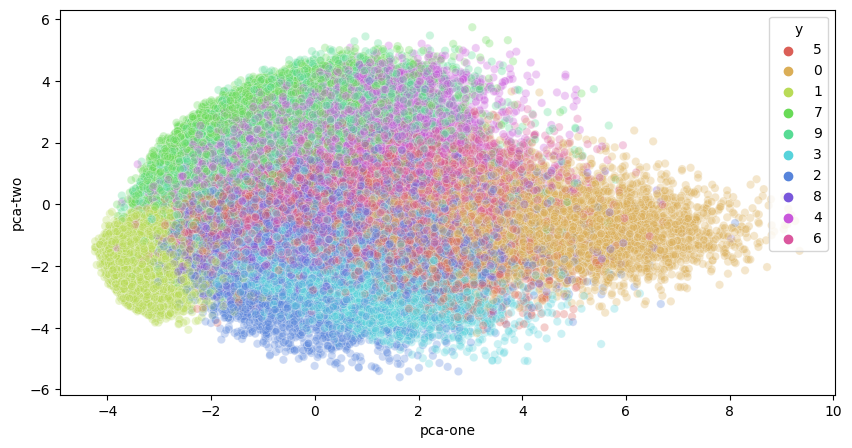

In [97]:
plt.figure(figsize=(10,5))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

In [102]:
N = 10000

df_subset = df.loc[rndperm[:N],:].copy()

data_subset = df_subset[feat_cols].values

pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)

df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))



Explained variation per principal component: [0.09525858 0.0719732  0.06205564]


In [105]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)

print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))


/home/rober/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/rober/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.005s...
[t-SNE] Computed neighbors for 10000 samples in 2.704s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.148347
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.904251
[t-SNE] KL divergence after 300 iterations: 2.815329


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

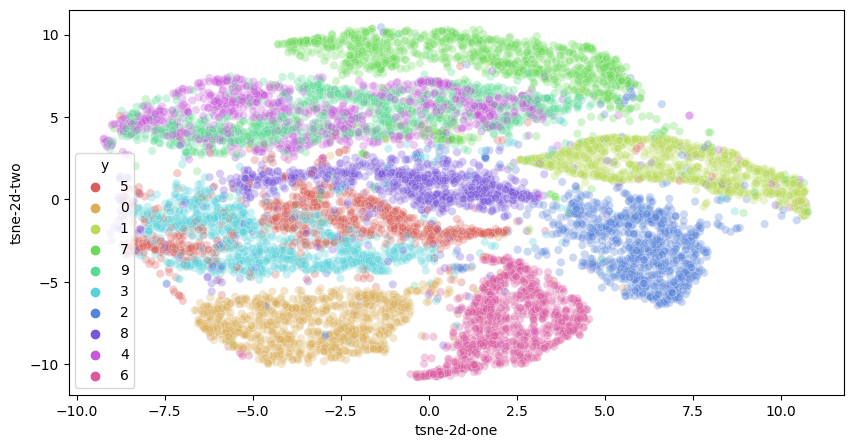

In [106]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(10,5))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

In [107]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)

print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))


Cumulative explained variation for 50 principal components: 0.8254724394576473


In [108]:
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)


/home/rober/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/rober/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


<AxesSubplot:xlabel='tsne-pca50-one', ylabel='tsne-pca50-two'>

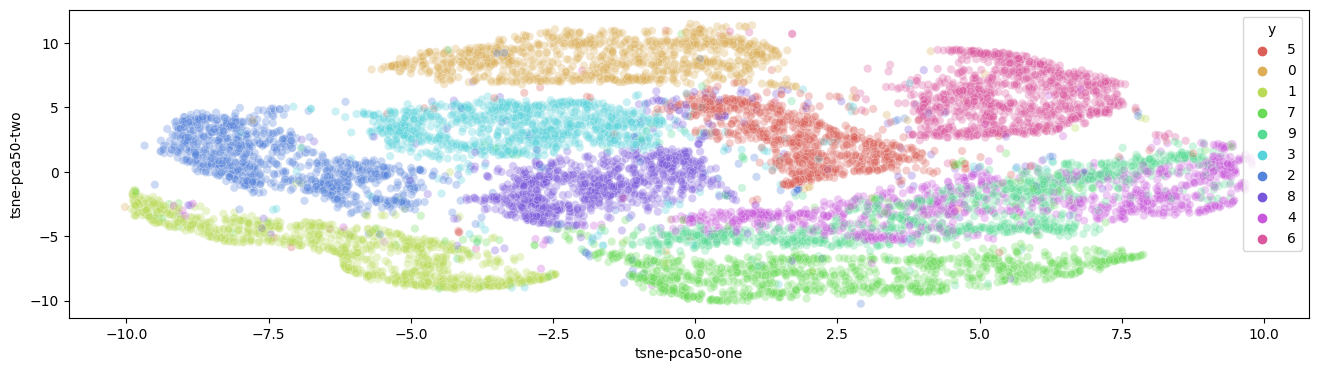

In [110]:
df_subset['tsne-pca50-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca50-two'] = tsne_pca_results[:,1]
plt.figure(figsize=(16,4))
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

<AxesSubplot:xlabel='tsne-pca50-one', ylabel='tsne-pca50-two'>

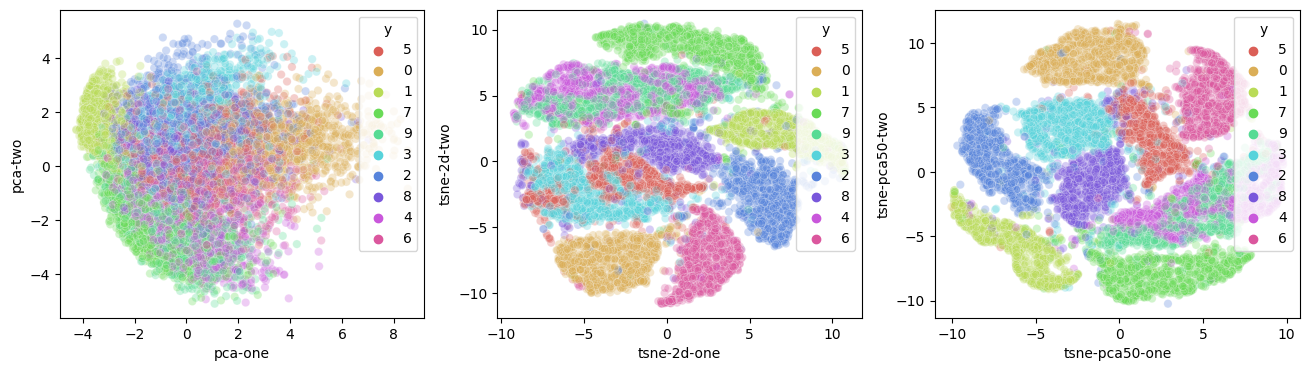

In [111]:
plt.figure(figsize=(16,4))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax3
)

## Partial Least Squares (PLS)

Partial least squares (PLS) regression is a technique that reduces the predictors to a smaller set of uncorrelated components and performs least squares regression on these components, instead of on the original data. PLS regression is especially useful when your predictors are highly collinear, or when you have more predictors than observations and ordinary least-squares regression either produces coefficients with high standard errors or fails completely. PLS does not assume that the predictors are fixed, unlike multiple regression. This means that the predictors can be measured with error, making PLS more robust to measurement uncertainty.

In [120]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
X = [[0., 0., 1.], [1.,0.,0.], [2.,2.,2.], [2.,5.,4.]]
Y = [[0.1, -0.2], [0.9, 1.1], [6.2, 5.9], [11.9, 12.3]]
pls2 = PLSRegression(n_components=2)
pls2.fit(X, Y)

Y_pred = pls2.predict(X)

print(pls2.score(X,Y))
print(mean_squared_error(Y, Y_pred))
print(r2_score(Y,Y_pred))

0.9937978749061623
0.14724976862035938
0.9937978749061623


## Linear Discriminant Analysis (LDA)


Linear Discriminant Analysis, or LDA for short, is a predictive modeling algorithm for multi-class classification. It can also be used as a dimensionality reduction technique, providing a projection of a training dataset that best separates the examples by their assigned class.

Itseeks to best separate (or discriminate) the samples in the training dataset by their class value. Specifically, the model seeks to find a linear combination of input variables that achieves the maximum separation for samples between classes (class centroids or means) and the minimum separation of samples within each class.


In [121]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target


In [122]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create an instance of the LinearDiscriminantAnalysis class and fit it to the training data
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)


LinearDiscriminantAnalysis()

In [123]:
# Make predictions on the testing data
y_pred = lda.predict(X_test)

# Evaluate the performance using various metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))

Accuracy: 0.9777777777777777
Precision: 0.9722222222222222
Recall: 0.9814814814814815


## Multiple factor analysis 

Factor Analysis (FA) is an exploratory data analysis method used to search influential underlying factors or latent variables from a set of observed variables. It helps in data interpretations by reducing the number of variables. It extracts maximum common variance from all variables and puts them into a common score.

Factor analysis is widely utilized in market research, advertising, psychology, finance, and operation research. Market researchers use factor analysis to identify price-sensitive customers, identify brand features that influence consumer choice, and helps in understanding channel selection criteria for the distribution channel.

What is a factor?

A factor is a latent variable which describes the association among the number of observed variables. The maximum number of factors are equal to a number of observed variables. Every factor explains a certain variance in observed variables. The factors with the lowest amount of variance were dropped. Factors are also known as latent variables or hidden variables or unobserved variables or Hypothetical variables.

Let's perform factor analysis on BFI (dataset based on personality assessment project), which were collected using a 6 point response scale: 1 Very Inaccurate, 2 Moderately Inaccurate, 3 Slightly Inaccurate 4 Slightly Accurate, 5 Moderately Accurate, and 6 Very Accurate. 

In [134]:
# Import required libraries
#!pip install factor_analyzer
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

df= pd.read_csv("data/bfi.csv", index_col=0)
df

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67551,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,...,NaN,1.0,6.0,1,6.0,6.0,1.0,1,3.0,19
67552,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,...,3.0,3.0,6.0,3,5.0,4.0,2.0,1,4.0,27
67556,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,...,3.0,1.0,5.0,1,6.0,4.0,3.0,2,4.0,29
67559,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,...,4.0,1.0,5.0,2,5.0,5.0,1.0,1,4.0,31


In [135]:
# remove unnecesary columns
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)
# drop NaN's
df.dropna(inplace=True)

Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [139]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.8486452309468395

For choosing the number of factors, you can use the Kaiser criterion and scree plot. Both are based on eigenvalues.

In [144]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(25,rotation=None)
fa.fit(df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

Here, you can see only for 6-factors eigenvalues are greater than one. It means we need to choose only 6 factors (or unobserved variables).

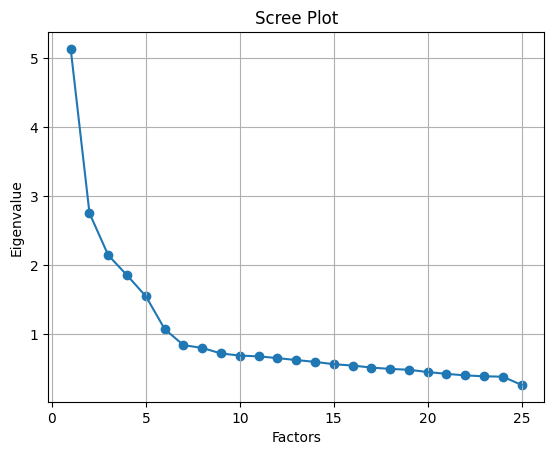

In [145]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


The scree plot method draws a straight line for each factor and its eigenvalues. Number eigenvalues greater than one considered as the number of factors.

Here, you can see only for 6-factors eigenvalues are greater than one. It means we need to choose only 6 factors (or unobserved variables).

In [165]:
fa = FactorAnalyzer(6, rotation="varimax")
fa.fit(df)
pd.DataFrame(data=fa.loadings_, 
             index=df.columns, 
             columns = ['Factor'+str(i+1) for i in range(6)]).style.background_gradient(cmap='Blues')

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
A1,0.095220,0.040783,0.048734,-0.530987,-0.113057,0.161216
A2,0.033131,0.235538,0.133714,0.661141,0.063734,-0.006244
A3,-0.009621,0.343008,0.121353,0.605933,0.033990,0.160106
A4,-0.081518,0.219717,0.235140,0.404594,-0.125338,0.086356
A5,-0.149616,0.414458,0.106382,0.469698,0.030977,0.236519
C1,-0.004358,0.077248,0.554582,0.007511,0.190124,0.095035
C2,0.068330,0.038370,0.674545,0.057055,0.087593,0.152775
C3,-0.039994,0.031867,0.551164,0.101282,-0.011338,0.008996
C4,0.216283,-0.066241,-0.638475,-0.102617,-0.143846,0.318359
C5,0.284187,-0.180812,-0.544838,-0.059955,0.025837,0.132423


- Factor 1 has high factor loadings for N1,N2,N3,N4, and N5 (Neuroticism)
- Factor 2 has high factor loadings for E1,E2,E3,E4, and E5 (Extraversion)
- Factor 3 has high factor loadings for C1,C2,C3,C4, and C5 (Conscientiousness)
- Factor 4 has high factor loadings for A1,A2,A3,A4, and A5 (Agreeableness)
- Factor 5 has high factor loadings for O1,O2,O3,O4, and O5 (Opennness)
- Factor 6 has none of the high loagings for any variable and is not easily interpretable. Its good if we take only five factors.

In [166]:
fa = FactorAnalyzer(5, rotation="varimax")
fa.fit(df)
pd.DataFrame(data=fa.loadings_, 
             index=df.columns, 
             columns = ['Factor'+str(i+1) for i in range(5)]).style.background_gradient(cmap='Blues')

,Factor1,Factor2,Factor3,Factor4,Factor5
A1,0.111126,0.040465,0.022798,-0.428166,-0.077931
A2,0.029588,0.213716,0.139037,0.626946,0.062139
A3,0.009357,0.317848,0.109331,0.650743,0.056196
A4,-0.066476,0.204566,0.230584,0.435624,-0.112700
A5,-0.122113,0.393034,0.087869,0.537087,0.066708
C1,0.010416,0.070184,0.545824,0.038878,0.209584
C2,0.089574,0.033270,0.648731,0.102782,0.115434
C3,-0.030855,0.023907,0.557036,0.111578,-0.005183
C4,0.240410,-0.064984,-0.633806,-0.037498,-0.107535
C5,0.290318,-0.176395,-0.562467,-0.047525,0.036822


## Independent component analysis (ICA)

It separates a multivariate signal into additive subcomponents that are maximally independent. It is implemented in scikit-learn using the Fast ICA algorithm. Typically, ICA is not used for reducing dimensionality but for separating superimposed signals. Since the ICA model does not include a noise term, for the model to be correct, whitening must be applied. This can be done internally using the whiten argument or manually using one of the PCA variants.



In [167]:
import numpy as np
from scipy import signal

np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations



In [168]:
from sklearn.decomposition import FastICA, PCA

# Compute ICA
ica = FastICA(n_components=3, whiten="arbitrary-variance")
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components


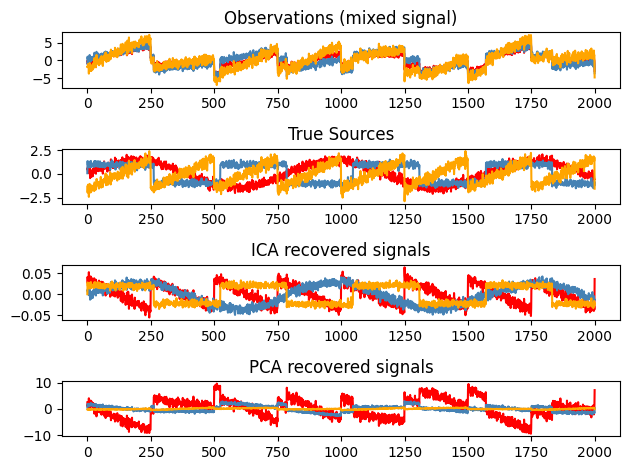

In [169]:
import matplotlib.pyplot as plt

plt.figure()

models = [X, S, S_, H]
names = [
    "Observations (mixed signal)",
    "True Sources",
    "ICA recovered signals",
    "PCA recovered signals",
]
colors = ["red", "steelblue", "orange"]

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()